In [1]:
from sklearn.datasets import load_breast_cancer 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
import numpy as np 

In [2]:
data= load_breast_cancer()

In [4]:
print(data.feature_names)
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


## In this data we are going to perdiction of the person  as cancer that is malignant and if not than benign or not hramfull tumor
### feature is to classifier and target to get thr reuslts 

In [5]:
x_train , x_test , y_train ,y_test = train_test_split(np.array(data.data) , np.array(data.target) , test_size =0.2)

### teake the data which is features put them in numpy array then take all classification that is target put them in another nupy array and split 20% in teat and 80% in train 

In [7]:
clf = KNeighborsClassifier(n_neighbors=3 )
clf.fit(x_train , y_train)
print(clf.score(x_test , y_test))

0.9385964912280702


## This is good score if we feed a parameter into the model it with the help of all this feactures it will give that it is a dangerouse cancer or not 

## Now you can put the values in it clf.predict([]) for ex:

In [8]:
# Sample input feature values (replace these with actual values you want to predict on)
sample_input = np.array([[15.3, 25.4, 102.7, 750.3, 0.103, 0.140, 0.137, 0.075, 0.191, 0.059, 
                          0.39, 1.19, 2.47, 35.5, 0.0065, 0.030, 0.032, 0.016, 0.014, 0.004,
                          16.1, 32.5, 123.4, 940.1, 0.132, 0.250, 0.222, 0.144, 0.244, 0.091]])

# Predict using the classifier
prediction = clf.predict(sample_input)

print("Prediction:", prediction)

Prediction: [0]


# Another example of the file 

## This example is of churn custormers 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")

In [3]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Assuming 'data' is your dataframe
x = data[['age', 'balance']].values
y = data['credit_card'].values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### feautre scaling is for make the data fit in 0 and 1 like salary cannot come in x- axis so we do feautre scaling 

In [8]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [9]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=9)

In [10]:
from matplotlib.colors import ListedColormap 

C:\Users\Tejaswi\AppData\Local\Temp\ipykernel_14968\1573381433.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


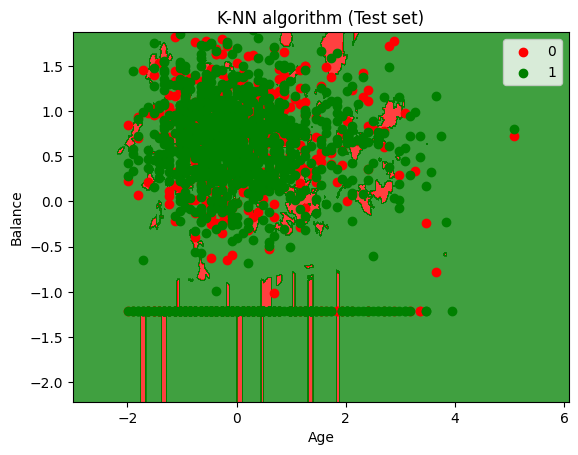

In [11]:
x_set, y_set = x_test, y_test
x1 , x2 = np.meshgrid(
          np.arange(start= x_set[:, 0].min() -1 , stop = x_set [:, 0].max() +1 , step = 0.01),
          np.arange(start=x_set[: , 1].min() -1 , stop = x_set [: 1].max() +1 , step = 0.01)
)
z = classifier.predict(np.array([x1.ravel() , x2.ravel()]).T).reshape(x1.shape)
plt.contourf(x1 , x2 , z , alpha=0.75 , cmap = ListedColormap(('red' , 'green')))
plt.xlim(x1.min() , x1.max())
plt.ylim(x2.min() , x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('K-NN algorithm (Test set)')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend()
plt.show()

# The plot helps visualize how well the K-NN classifier is separating the two classes (churn vs. no churn) based on "Age" and "Balance."
# It also allows you to see if there are regions where the classifier is confused (e.g., a mix of red and green dots in the same region).
# In this plot, it appears there are a significant number of overlaps and misclassifications, indicating that "Age" and "Balance" alone might not be enough to clearly separate the two classes.

### we will check the accuracy I think accuracy will be not that great of this model because in this have only dane KNN but if we do LInear regression , random forest , diffret aloritm we can imporve the accuracy 

In [13]:
classifier.fit(x_train, y_train)

# Calculate the accuracy on the test set
accuracy = classifier.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.651
